In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
import numpy as np
def extract_features(directory, sample_count,numclass):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,numclass))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [ ]:
train_dir="/content/drive/MyDrive/flower_classification/data/train"
validation_dir="/content/drive/MyDrive/flower_classification/data/val"
test_dir="/content/drive/MyDrive/flower_classification/data/test"

In [ ]:
train_features, train_labels = extract_features(train_dir, 3452 ,5)
validation_features, validation_labels = extract_features(validation_dir, 430,5)

In [ ]:
train_features = np.reshape(train_features, (3452, 4*4* 512))
validation_features = np.reshape(validation_features, (430, 4*4* 512))

In [ ]:
train_features.shape

(3452, 8192)

In [ ]:
train_labels.shape

(3452, 5)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(),
    loss='categorical_crossentropy',
    metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=32,
validation_data=(validation_features, validation_labels))

Epoch 1/30
108/108 [==============================] - 1s 8ms/step - loss: 1.3238 - acc: 0.5669 - val_loss: 0.7160 - val_acc: 0.7442
Epoch 2/30
108/108 [==============================] - 1s 6ms/step - loss: 0.7707 - acc: 0.7115 - val_loss: 0.6480 - val_acc: 0.7744
Epoch 3/30
108/108 [==============================] - 1s 6ms/step - loss: 0.6570 - acc: 0.7598 - val_loss: 0.5556 - val_acc: 0.7953
Epoch 4/30
108/108 [==============================] - 1s 6ms/step - loss: 0.5672 - acc: 0.7963 - val_loss: 0.6013 - val_acc: 0.7744
Epoch 5/30
108/108 [==============================] - 1s 6ms/step - loss: 0.4972 - acc: 0.8253 - val_loss: 0.5893 - val_acc: 0.7884
Epoch 6/30
108/108 [==============================] - 1s 6ms/step - loss: 0.4197 - acc: 0.8520 - val_loss: 0.5921 - val_acc: 0.8047
Epoch 7/30
108/108 [==============================] - 1s 6ms/step - loss: 0.3809 - acc: 0.8572 - val_loss: 0.7169 - val_acc: 0.7651
Epoch 8/30
108/108 [==============================] - 1s 6ms/step - loss: 0.

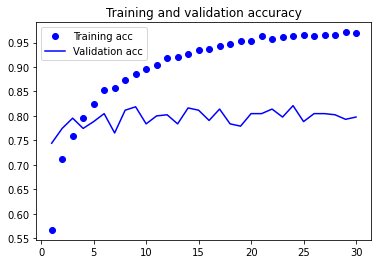

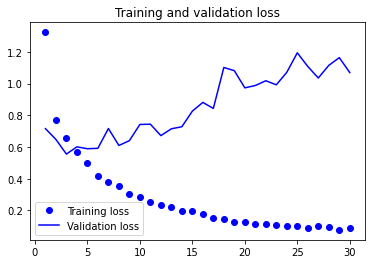

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('flower_trans.h5')

In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(5, activation='softmax'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/flower_classification/data/train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/flower_classification/data/val",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [ ]:
from tensorflow.keras import optimizers
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['acc'])

In [ ]:
History = model2.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
80/80 [==============================] - 31s 378ms/step - loss: 1.6413 - acc: 0.5340 - val_loss: 1.0240 - val_acc: 0.6844
Epoch 2/30
80/80 [==============================] - 30s 371ms/step - loss: 0.9492 - acc: 0.6408 - val_loss: 0.7432 - val_acc: 0.7219
Epoch 3/30
80/80 [==============================] - 29s 363ms/step - loss: 0.8426 - acc: 0.6909 - val_loss: 0.6949 - val_acc: 0.7594
Epoch 4/30
80/80 [==============================] - 29s 366ms/step - loss: 0.7447 - acc: 0.7195 - val_loss: 0.7627 - val_acc: 0.7437
Epoch 5/30
80/80 [==============================] - 29s 363ms/step - loss: 0.7342 - acc: 0.7297 - val_loss: 0.6026 - val_acc: 0.7844
Epoch 6/30
80/80 [==============================] - 29s 365ms/step - loss: 0.6970 - acc: 0.7355 - val_loss: 0.5604 - val_acc: 0.7969
Epoch 7/30
80/80 [==============================] - 29s 363ms/step - loss: 0.6550 - acc: 0.7613 - val_loss: 0.5769 - val_acc: 0.7844
Epoch 8/30
80/80 [==============================] - 29s 363ms/step - 

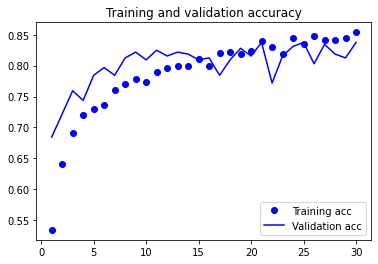

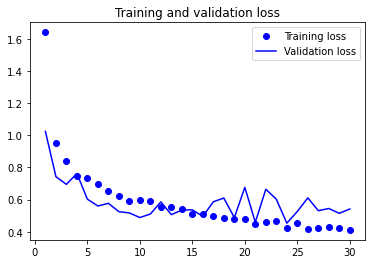

In [ ]:
import matplotlib.pyplot as plt
acc = History.history['acc']
val_acc = History.history['val_acc']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['acc'])

In [ ]:
History = model2.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
80/80 [==============================] - 33s 382ms/step - loss: 87.7173 - acc: 0.2895 - val_loss: 1.7941 - val_acc: 0.1813
Epoch 2/30
80/80 [==============================] - 31s 380ms/step - loss: 1.7469 - acc: 0.3277 - val_loss: 1.2535 - val_acc: 0.4719
Epoch 3/30
80/80 [==============================] - 30s 376ms/step - loss: 2.4153 - acc: 0.4624 - val_loss: 1.1281 - val_acc: 0.5844
Epoch 4/30
80/80 [==============================] - 30s 378ms/step - loss: 1.3227 - acc: 0.5250 - val_loss: 0.8863 - val_acc: 0.5750
Epoch 5/30
80/80 [==============================] - 30s 375ms/step - loss: 1.2479 - acc: 0.6107 - val_loss: 0.8047 - val_acc: 0.7344
Epoch 6/30
80/80 [==============================] - 30s 375ms/step - loss: 0.9738 - acc: 0.6851 - val_loss: 0.5346 - val_acc: 0.8125
Epoch 7/30
80/80 [==============================] - 30s 374ms/step - loss: 1.0627 - acc: 0.7164 - val_loss: 0.8387 - val_acc: 0.6875
Epoch 8/30
80/80 [==============================] - 30s 371ms/step -

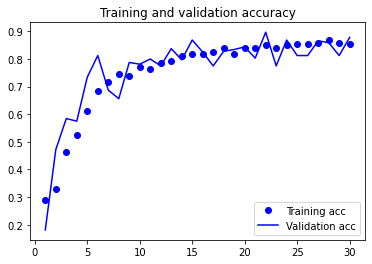

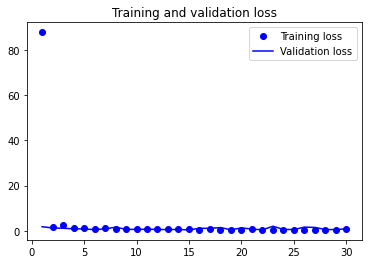

In [ ]:
import matplotlib.pyplot as plt
acc = History.history['acc']
val_acc = History.history['val_acc']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('flower_finetune.h5')